# Imports

### Libraries

In [1]:
import random
import os
import pickle

# Data exportation
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import h5py

# Data analysis
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data transformation
import cv2

### Dataset

In [2]:
datasets_folder = "../datasets"
fruits_dataset = f"{datasets_folder}/fruits_360/"
cleaned_dataset = f"{datasets_folder}/"

# Exploratory data analysis

Analyse the dataset and create a subset.

### Dataset files and folders

Get the dataset file and folders

In [3]:
def list_folders(startpath):
    """Print the folder sutructure of a given folder"""
    
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}"{}",'.format(indent, os.path.basename(root)))

In [4]:
# list_folders(fruits_dataset + "Training")

### Load images path

In [5]:
categories = [
    "Tomato 2",
    "Pear",
    "Potato Red",
    "Avocado ripe",
    "Tomato not Ripened",
    "Pear Monster",
    "Kohlrabi",
    "Watermelon",
    "Orange",
    "Papaya",
    "Apple Pink Lady",
    "Hazelnut",
    "Mulberry",
    "Plum 2",
    "Tomato 3",
    "Apple Red 1",
    "Potato Sweet",
    "Mango Red",
    "Apple Crimson Snow",
    "Apple Golden 3",
    "Huckleberry",
    "Salak",
    "Dates",
    "Apple Red Yellow 1",
    "Cantaloupe 1",
    "Rambutan",
    "Pear Red",
    "Grape Blue",
    "Grapefruit White",
    "Cherry Wax Yellow",
    "Plum",
    "Grape White",
    "Onion Red",
    "Cucumber Ripe 2",
    "Pomegranate",
    "Cactus fruit",
    "Walnut",
    "Cocos",
    "Tomato 4",
    "Corn",
    "Tomato Yellow",
    "Tomato Maroon",
    "Potato White",
    "Apple Red Delicious",
    "Grapefruit Pink",
    "Banana Red",
    "Corn Husk",
    "Cantaloupe 2",
    "Pear Stone",
    "Eggplant",
    "Tamarillo",
    "Cherry Wax Black",
    "Ginger Root",
    "Pepper Yellow",
    "Passion Fruit",
    "Guava",
    "Apple Granny Smith",
    "Clementine",
    "Grape White 4",
    "Pitahaya Red",
    "Cherry 2",
    "Cherry Rainier",
    "Tomato Cherry Red",
    "Banana",
    "Apple Red 2",
    "Potato Red Washed",
    "Fig",
    "Peach",
    "Pepper Orange",
    "Kumquats",
    "Tomato Heart",
    "Beetroot",
    "Chestnut",
    "Pepino",
    "Mangostan",
    "Apple Red Yellow 2",
    "Blueberry",
    "Grape White 3",
    "Banana Lady Finger",
    "Melon Piel de Sapo",
    "Pepper Red",
    "Pear Williams",
    "Onion White",
    "Physalis",
    "Redcurrant",
    "Carambula",
    "Lychee",
    "Nectarine Flat",
    "Peach Flat",
    "Quince",
    "Pomelo Sweetie",
    "Mandarine",
    "Cherry Wax Red",
    "Nut Pecan",
    "Apple Braeburn",
    "Avocado",
    "Tangelo",
    "Apple Golden 2",
    "Pepper Green",
    "Strawberry Wedge",
    "Pear Abate",
    "Physalis with Husk",
    "Nectarine",
    "Apple Golden 1",
    "Pear 2",
    "Apricot",
    "Pear Kaiser",
    "Pineapple",
    "Nut Forest",
    "Plum 3",
    "Kaki",
    "Tomato 1",
    "Grape White 2",
    "Pineapple Mini",
    "Raspberry",
    "Grape Pink",
    "Cucumber Ripe",
    "Lemon Meyer",
    "Onion Red Peeled",
    "Cherry 1",
    "Cauliflower",
    "Strawberry",
    "Mango",
    "Maracuja",
    "Limes",
    "Peach 2",
    "Lemon",
    "Granadilla",
    "Pear Forelle",
    "Kiwi",
    "Apple Red 3"
]

In [6]:
train_images = {}
test_images = {}

for category in categories:
    train_images[category] = [f for f in glob.glob(f"{fruits_dataset}Training/{category}/" + "**/*.jpg", recursive=True)]

for category in categories:
    test_images[category] = [f for f in glob.glob(f"{fruits_dataset}Test/{category}/" + "**/*.jpg", recursive=True)]


### Full dataset distribution

This dataset seems quite equally distributed

<BarContainer object of 131 artists>

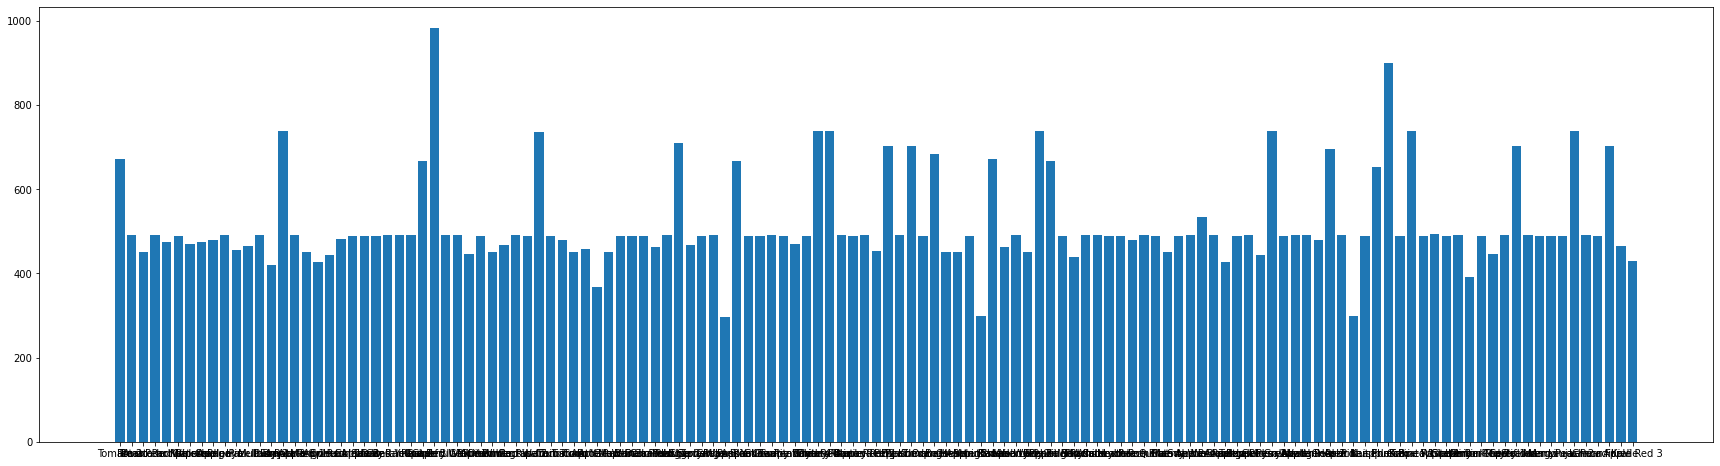

In [7]:
lengths = [len(category) for category in train_images.values()]

plt.figure(figsize=(30, 8))
plt.bar(categories, lengths)

### Subset creation

We'll do a model with some fruits (not all). And we'll start by some distincs ones:

In [8]:
subset = [
    "Apple Red Yellow 1",
    "Orange",
    "Banana",
    "Watermelon",
    "Kiwi",
    "Avocado"
]

In [9]:
df = pd.DataFrame(columns=['label', 'path'])

images = [train_images, test_images]

# Take all categories for Train and Test
for category in subset:
    for folder in images:
        
        # Take all images for this category
        for path in folder[category]:
            
            # Save to the dataframe
            df = df.append({'label': category, 'path': path}, ignore_index=True)

In [10]:
df.head()

,label,path
0,Apple Red Yellow 1,../datasets/fruits_360/Training/Apple Red Yell...
1,Apple Red Yellow 1,../datasets/fruits_360/Training/Apple Red Yell...
2,Apple Red Yellow 1,../datasets/fruits_360/Training/Apple Red Yell...
3,Apple Red Yellow 1,../datasets/fruits_360/Training/Apple Red Yell...
4,Apple Red Yellow 1,../datasets/fruits_360/Training/Apple Red Yell...


### Label encoding

In [11]:
df['label'] = df['label'].astype('category')

In [12]:
df["label_id"] = df["label"].cat.codes

Get a label dictionary

In [13]:
labels = df.set_index('label_id')['label'].to_dict()

In [14]:
labels

{0: 'Apple Red Yellow 1',
 4: 'Orange',
 2: 'Banana',
 5: 'Watermelon',
 3: 'Kiwi',
 1: 'Avocado'}

Save to disk

In [15]:
with open(f'{cleaned_dataset}labels.pickle', 'wb') as handle:
    pickle.dump(labels, handle)

### Subset data distribution

<BarContainer object of 6 artists>

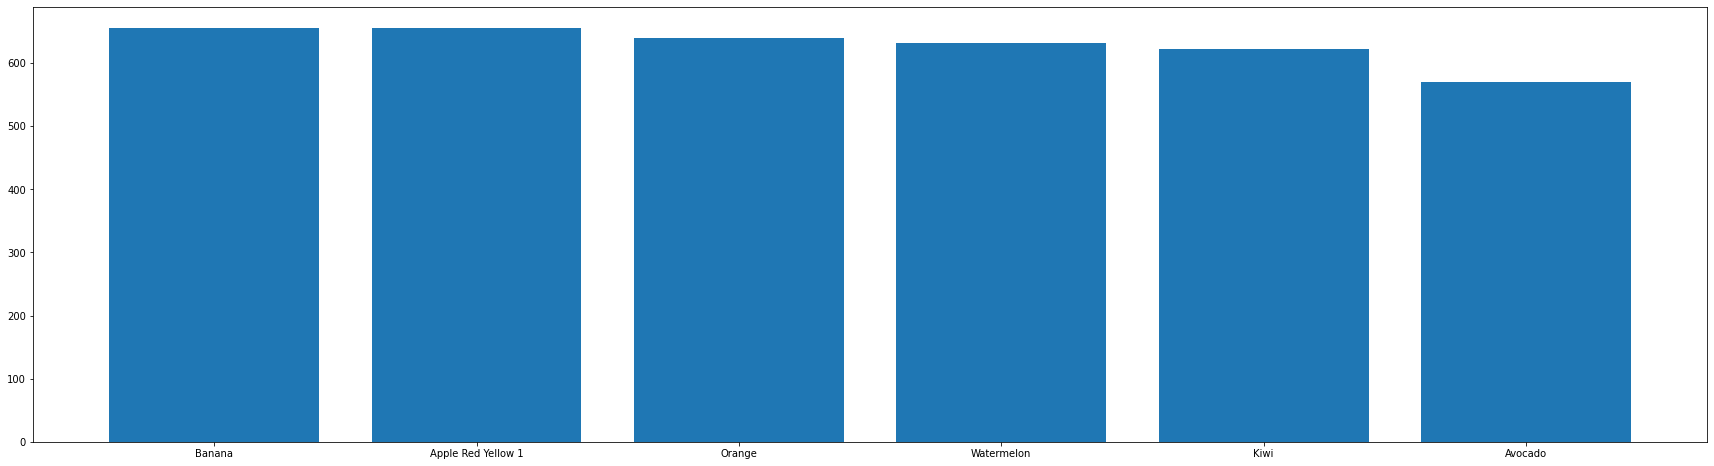

In [16]:
value_count = df['label'].value_counts()

plt.figure(figsize=(30, 8))
plt.bar(value_count.index, value_count.values)

### Images sizes

All images have the same size: 100x100

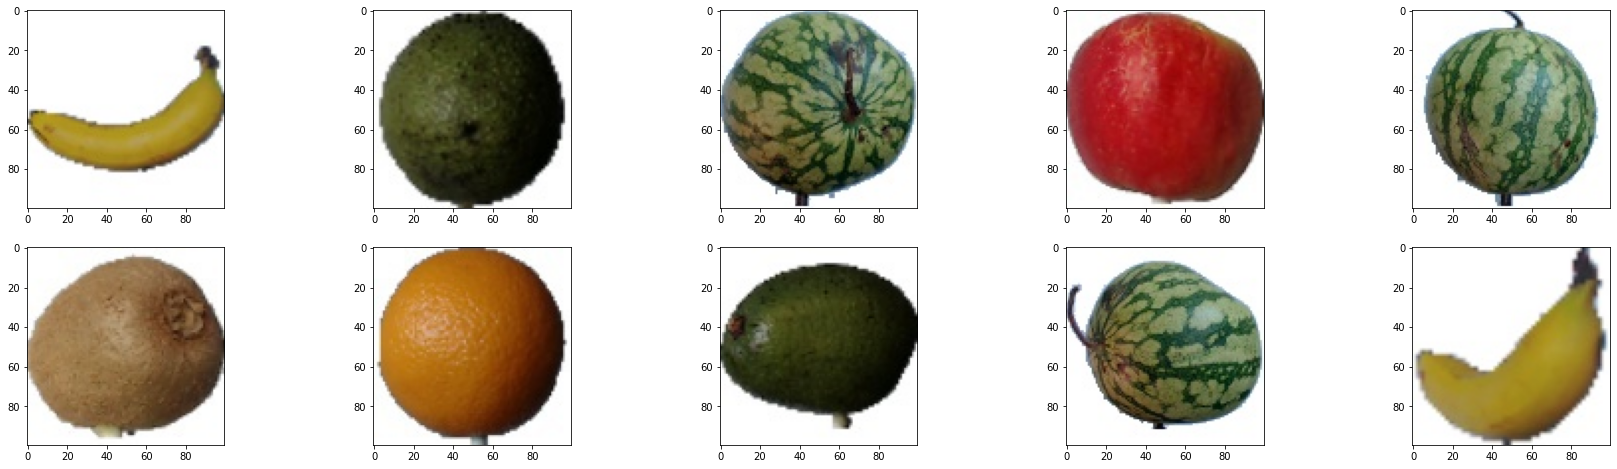

In [17]:
fig=plt.figure(figsize=(30, 8))
columns = 5
rows = 2

for i in range(1, columns*rows +1):
    
    # Open a random  image
    img_path = random.choice(df['path'])
    img = cv2.imread(img_path)
    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Print the image
    fig.add_subplot(rows, columns, i)
    plt.imshow(im_rgb)
    
plt.show()

# Data preprocessing

### Labels to np.array

In [18]:
labels_array = df["label_id"].to_numpy()

### Remove background

We need to remove the background. In production, a picture with removed background will help the model to identify a fruit, as he is trained based on background-less fruits.

Source: https://docs.opencv.org/master/d8/d83/tutorial_py_grabcut.html

In [19]:
def remove_background(image: np.array) -> np.array:
    
    # Add a padding of 10px around the image, white color
    bordered = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    
    # Blur the picture
    blurred = cv2.GaussianBlur(bordered, (5, 5), 0)

    # Create an empty mask and 2x float64[0, 64] arrays for the GrabCut algorithm
    mask = np.zeros(blurred.shape[:2], np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    # Cutting rectangle: Our pictures are 120x120
    # We define an inner rectangle. Everything ouside is sure background.
    # Everyhting inside is unknown, and will be determinated by the algorithm.
    rect = (10, 10, 110, 110)
    
    # Grabcut the image and return it
    cv2.grabCut(blurred, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    return blurred * mask2[:,:,np.newaxis]

In [20]:
def pytorch_axis(image: np.array) -> np.array:
    
    return np.moveaxis(image, 2, 0)

In [21]:
def normalization(image: np.array) -> np.array:
    
    image =  image / 255
    return image.astype(np.float32)

### Test preprocess

Give a try

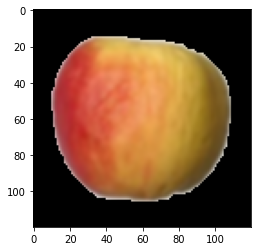

In [22]:
img = cv2.imread(random.choice(df['path']))

no_background = remove_background(img)
plt.imshow(cv2.cvtColor(no_background, cv2.COLOR_RGB2BGR))

In [23]:
sample = normalization(pytorch_axis(no_background))

In [24]:
sample.shape

(3, 120, 120)

In [25]:
print('min', sample.min())
print('max', sample.max())

min 0.0
max 0.96862745


In [26]:
sample.dtype

dtype('float32')

### Apply preprocessing

In [27]:
image_array = []

In [28]:
def preprocess(path: str) -> None:
    image_array.append(normalization(pytorch_axis(remove_background(cv2.imread(path)))))

In [29]:
df['path'].apply(preprocess)

0       None
1       None
2       None
3       None
4       None
        ... 
3770    None
3771    None
3772    None
3773    None
3774    None
Name: path, Length: 3775, dtype: object

In [30]:
image_array = np.array(image_array)

### Train/test split

Our test dataset must be consistent accross all evaluation we will do in the future (ONNX, C++, Tensor RT). We split and save the dataset now to be sure that we will have always the same testing set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(image_array, labels_array, test_size=0.20, random_state=42)

# Data exportation

In [32]:
h5_file_path = f"{cleaned_dataset}dataset.h5"

### Labels to h5py

In [34]:
with h5py.File(h5_file_path, 'a') as h5_data:
    h5_data.create_dataset('y_train', data = y_train, compression = 'gzip')
    h5_data.create_dataset('y_test', data = y_test, compression = 'gzip')

### y_test to npy

In [35]:
with open(f'{cleaned_dataset}y_test.npy', 'wb') as f:
    np.save(f, y_test)

### Images to h5py

In [36]:
with h5py.File(h5_file_path, 'a') as h5_data:
    h5_data.create_dataset('X_train', data = X_train, compression = 'gzip')
    h5_data.create_dataset('X_test', data = X_test, compression = 'gzip')

### X_text to npy

In [37]:
with open(f'{cleaned_dataset}X_test.npy', 'wb') as f:
    np.save(f, X_test)